# Linear Regression (Spotify Mega Dataset)

source：https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

This dataset contains audio statistics of the top 2000 tracks on Spotify. The data contains about 15 columns each describing the track and it's qualities. Songs released from 1956 to 2019 are included from some notable and famous artists like Queen, The Beatles, Guns N' Roses, etc.


## Data Preprocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Spotify-2000.csv", encoding='latin-1')
df.drop(columns="ï»¿Index", inplace = True)

In [ ]:
df.head()

Title             Artist  ... Speechiness  Popularity
0                 Sunrise        Norah Jones  ...           3          71
1             Black Night        Deep Purple  ...           7          39
2          Clint Eastwood           Gorillaz  ...          17          69
3           The Pretender       Foo Fighters  ...           4          76
4  Waitin' On A Sunny Day  Bruce Springsteen  ...           3          59

[5 rows x 14 columns]

In [ ]:
transform_dict = {"Top Genre":"Top_Genre", 
                  "Beats Per Minute (BPM)":"Beats_Per_Minute", 
                  "Loudness (dB)":"Loudness_dB",  
                  "Length (Duration)":"Length"
                  }
df.rename(columns = transform_dict, inplace = True)
df.head()

Title             Artist  ... Speechiness  Popularity
0                 Sunrise        Norah Jones  ...           3          71
1             Black Night        Deep Purple  ...           7          39
2          Clint Eastwood           Gorillaz  ...          17          69
3           The Pretender       Foo Fighters  ...           4          76
4  Waitin' On A Sunny Day  Bruce Springsteen  ...           3          59

[5 rows x 14 columns]

In [ ]:
genres = ["jazz","pop","adult standards","rock","country",
          "dance","indie","hip hop","metal","folk","big room",
          "blues","band","latin","soul",
          "rock-and-roll","disco","edm","electro","funk",]

In [ ]:
x = df.Top_Genre.tolist()

In [ ]:
xx = []
for i in x:
  xxx = ''
  for j in genres:
    if j in i:
      if j == "edm":
        xxx += "xxxelectro"
      elif j == "rock-and-roll":
        xxx += "xxxrock"
      elif j == "big room":
        xxx += "xxxelectro"
      else:
        xxx += 'xxx'
        xxx += j
  if xxx:
    xx.append(xxx)
  else:
    xx.append("NaN")
xx

['xxxadult standards',
 'xxxrock',
 'xxxhip hop',
 'xxxmetal',
 'xxxrock',
 'xxxpopxxxrock',
 'xxxpop',
 'xxxrock',
 'xxxrock',
 'xxxhip hop',
 'xxxadult standards',
 'xxxrock',
 'xxxindie',
 'xxxrock',
 'xxxrock',
 'NaN',
 'NaN',
 'xxxrock',
 'xxxpop',
 'xxxpopxxxdance',
 'NaN',
 'xxxrockxxxfolk',
 'xxxpop',
 'xxxrock',
 'xxxpop',
 'NaN',
 'xxxdance',
 'xxxhip hop',
 'xxxpop',
 'xxxpop',
 'NaN',
 'xxxrock',
 'xxxsoul',
 'xxxadult standards',
 'xxxsoul',
 'xxxpop',
 'xxxrock',
 'xxxrock',
 'xxxmetal',
 'xxxpop',
 'xxxdisco',
 'xxxelectro',
 'xxxrock',
 'xxxrock',
 'xxxmetal',
 'xxxpopxxxdance',
 'xxxrock',
 'xxxrock',
 'xxxadult standards',
 'xxxpopxxxrock',
 'xxxrock',
 'xxxpop',
 'NaN',
 'xxxmetal',
 'xxxpopxxxdance',
 'xxxpop',
 'xxxrock',
 'xxxpopxxxdance',
 'xxxband',
 'xxxrock',
 'NaN',
 'xxxcountry',
 'NaN',
 'xxxlatin',
 'xxxmetal',
 'xxxsoul',
 'xxxpopxxxdance',
 'xxxrock',
 'xxxpopxxxrock',
 'xxxpop',
 'xxxsoul',
 'xxxmetal',
 'xxxfolk',
 'NaN',
 'xxxrockxxxfolk',
 'xxxpop',


In [ ]:
df_xx = pd.DataFrame(xx,columns = ['Genres'])
df_xx

Genres
0     xxxadult standards
1                xxxrock
2             xxxhip hop
3               xxxmetal
4                xxxrock
...                  ...
1989  xxxadult standards
1990  xxxadult standards
1991     xxxrockxxxblues
1992                 NaN
1993  xxxadult standards

[1994 rows x 1 columns]

In [ ]:
df_xx_dummy = df_xx['Genres'].str.get_dummies('xxx')
df_xx_dummy.describe()

NaN  adult standards  ...         rock         soul
count  1994.000000      1994.000000  ...  1994.000000  1994.000000
mean      0.127884         0.061685  ...     0.429789     0.022568
std       0.334044         0.240643  ...     0.495170     0.148558
min       0.000000         0.000000  ...     0.000000     0.000000
25%       0.000000         0.000000  ...     0.000000     0.000000
50%       0.000000         0.000000  ...     0.000000     0.000000
75%       0.000000         0.000000  ...     1.000000     0.000000
max       1.000000         1.000000  ...     1.000000     1.000000

[8 rows x 18 columns]

In [ ]:
df_new = pd.concat([df, df_xx_dummy], axis = 1)
df_new.head()

Title             Artist  ... rock  soul
0                 Sunrise        Norah Jones  ...    0     0
1             Black Night        Deep Purple  ...    1     0
2          Clint Eastwood           Gorillaz  ...    0     0
3           The Pretender       Foo Fighters  ...    0     0
4  Waitin' On A Sunny Day  Bruce Springsteen  ...    1     0

[5 rows x 32 columns]

In [ ]:
df_new[df_new["NaN"]==1]

Title  ... soul
15                              Zonder Jou  ...    0
16                          Speed of Sound  ...    0
20                                 Fix You  ...    0
25                                 Miracle  ...    0
30                           The Scientist  ...    0
...                                    ...  ...  ...
1947  Here Comes The Sun - Remastered 2009  ...    0
1959       Come Together - Remastered 2009  ...    0
1960           Something - Remastered 2009  ...    0
1980                            Summertime  ...    0
1992                             Take Five  ...    0

[255 rows x 32 columns]

In [ ]:
df_new.drop(df_new[df_new["NaN"]==1].index, inplace=True)

In [ ]:
df_new.drop(columns=["Top_Genre","NaN"], inplace=True)

In [ ]:
df_new.to_csv("Spotify-2000_cleansed.csv", index = False)

## Linear Regression with `sklearn`

In [ ]:
!pip install statsmodels
!pip install pyreadstat

     |████████████████████████████████| 2.0MB 2.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Spotify-2000_cleansed.csv")
df.head(n=1)

Title       Artist  Year  Beats_Per_Minute  ...  metal  pop  rock  soul
0  Sunrise  Norah Jones  2004               157  ...      0    0     0     0

[1 rows x 30 columns]

### X-Y Preparation

In [ ]:
df_x = df.drop(columns = ["Title", "Artist", "Year", "Valence", "Length"])
y = df.Valence

In [ ]:
from sklearn.preprocessing import MinMaxScaler # (X - Xmin) / Range
scaler = MinMaxScaler()
scaler.fit(df_x)

# StandardScaler: (X - Xmean) / Std

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x = scaler.transform(df_x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

### Modelling

In [ ]:
# with Cross-Validation
# lm = linear_model.RidgeCV(alphas = alphas_grid, fit_intercept = True, normalize = True, max_iter = 1000, tol = 0.001, cv = 5, random_state = 48)
# lm = linear_model.LassoCV(alphas = alphas_grid, fit_intercept = True, normalize = True, max_iter = 1000, tol = 0.001, cv = 5, random_state = 48)

# without Cross-validation
# lm = linear_model.Ridge(alpha = XXX, fit_intercept = True, normalize = True)
# lm = linear_model.Lasso(alpha = xxx, fit_intercept = True, normalize = True)

# Model selection in sklearn
# check out sklearn.model_selection 
# K-fold, cross_validate, GridSearchCV etc.

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept = True, normalize = False)

In [ ]:
lm_fitted = lm.fit(x_train, y_train)

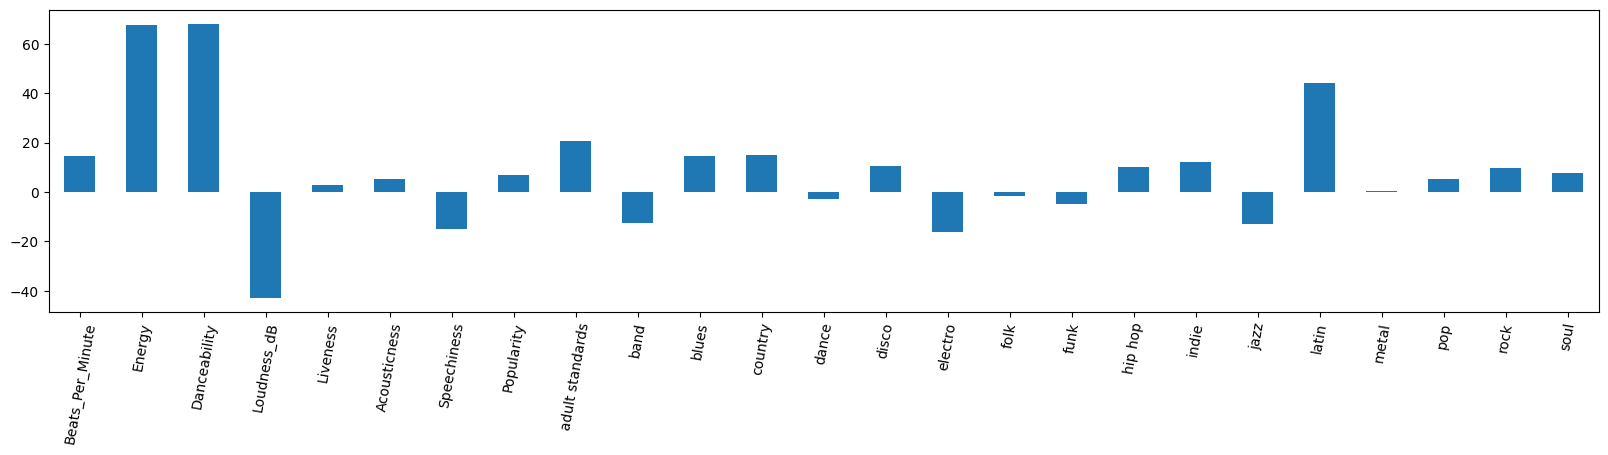

In [ ]:
plt.figure(figsize=(20, 4), dpi = 100)
ax = pd.Series(lm_fitted.coef_, index=df_x.columns).plot.bar(rot = 80)

### Model Evaluation

In [ ]:
y_hat_train = lm_fitted.predict(x_train)
y_hat_test = lm_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 304.92
  + coefficient of determination: 0.51
Performance on Testing Data
  + mean squared error: 336.16
  + coefficient of determination: 0.47


## Polynomial Regression with `patsy` & `sklearn`

### X-Y Preparation

In [ ]:
df.columns

Index(['Title', 'Artist', 'Year', 'Beats_Per_Minute', 'Energy', 'Danceability',
       'Loudness_dB', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity', 'adult standards', 'band', 'blues',
       'country', 'dance', 'disco', 'electro', 'folk', 'funk', 'hip hop',
       'indie', 'jazz', 'latin', 'metal', 'pop', 'rock', 'soul'],
      dtype='object')

In [ ]:
from patsy import dmatrix
# this formula specify a degree 2 polynomial model that contains all interaction terms
formula = "(" + " + ".join(list(df.drop(columns = ['Title', 'Artist', 'Year', 'Length', "Valence", 'adult standards', 'band', 'blues',
       'country', 'dance', 'disco', 'electro', 'folk', 'funk', 'hip hop',
       'indie', 'jazz', 'latin', 'metal', 'pop', 'rock', 'soul']).columns)) + ")" + "**2"

In [ ]:
formula

'(Beats_Per_Minute + Energy + Danceability + Loudness_dB + Liveness + Acousticness + Speechiness + Popularity)**2'

In [ ]:
x_poly = dmatrix(formula, data = df.drop(columns = ['Title', 'Artist', 'Year', 'Length', "Valence", 'adult standards', 'band', 'blues',
       'country', 'dance', 'disco', 'electro', 'folk', 'funk', 'hip hop',
       'indie', 'jazz', 'latin', 'metal', 'pop', 'rock', 'soul']), return_type = "dataframe")

In [ ]:
x_poly.head()

Intercept  Beats_Per_Minute  ...  Acousticness:Popularity  Speechiness:Popularity
0        1.0             157.0  ...                   6674.0                   213.0
1        1.0             135.0  ...                    663.0                   273.0
2        1.0             168.0  ...                    138.0                  1173.0
3        1.0             173.0  ...                      0.0                   304.0
4        1.0             106.0  ...                     59.0                   177.0

[5 rows x 37 columns]

In [ ]:
x_poly.shape

(1739, 37)

In [ ]:
x_poly

In [ ]:
df_genre = df[['adult standards', 'band', 'blues', 'country', 'dance', 'disco', 
               'electro', 'folk', 'funk', 'hip hop', 'indie', 'jazz', 'latin', 
               'metal', 'pop', 'rock', 'soul']]

In [ ]:
x_poly = pd.concat([x_poly, df_genre], axis = 1)
x_poly.head()

Intercept  Beats_Per_Minute  Energy  Danceability  ...  metal  pop  rock  soul
0        1.0             157.0    30.0          53.0  ...      0    0     0     0
1        1.0             135.0    79.0          50.0  ...      0    0     1     0
2        1.0             168.0    69.0          66.0  ...      0    0     0     0
3        1.0             173.0    96.0          43.0  ...      1    0     0     0
4        1.0             106.0    82.0          58.0  ...      0    0     1     0

[5 rows x 54 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler # (X - Xmin) / Range
scaler = MinMaxScaler()
scaler.fit(x_poly)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x = scaler.transform(x_poly)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

### Modelling

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept = True, normalize = False)

In [ ]:
lm_fitted = lm.fit(x_train, y_train)

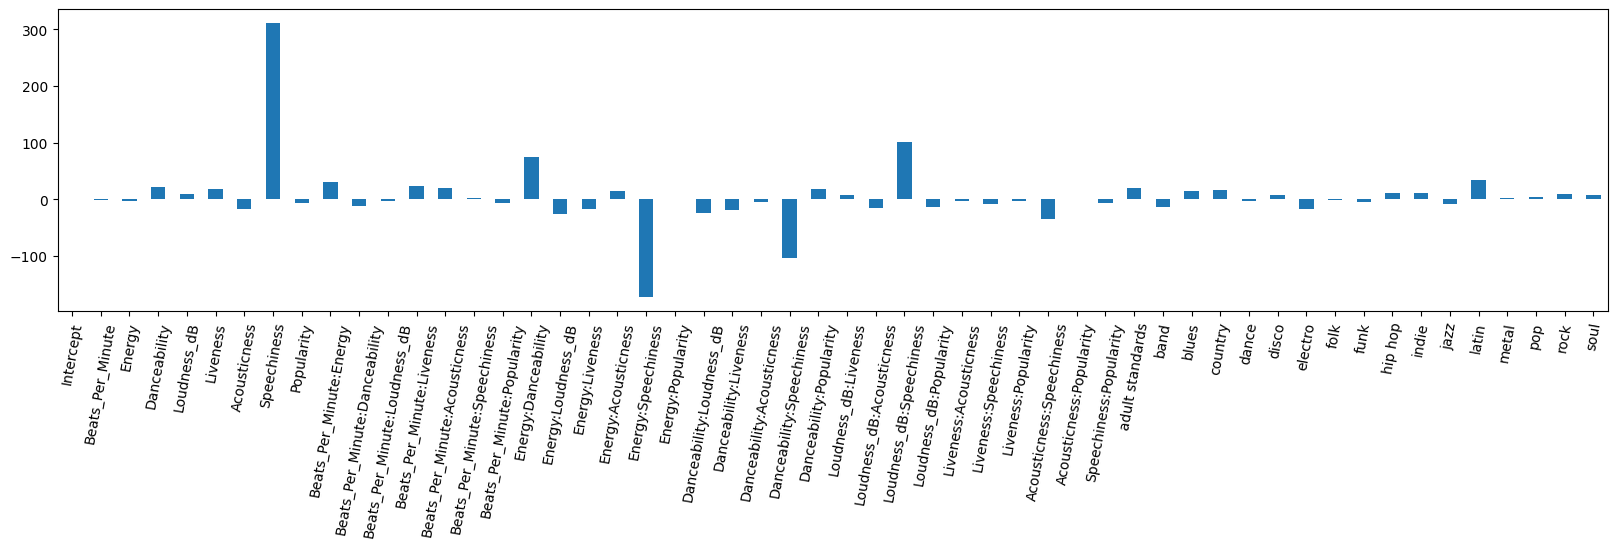

In [ ]:
plt.figure(figsize=(20, 4), dpi = 100)
ax = pd.Series(lm_fitted.coef_, index=x_poly.columns).plot.bar(rot = 80)

### Model Evaluation

In [ ]:
y_hat_train = lm_fitted.predict(x_train)
y_hat_test = lm_fitted.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Performance on Training Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_train, y_hat_train))
print('  + coefficient of determination: %.2f' % r2_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + mean squared error: %.2f' % mean_squared_error(y_test, y_hat_test))
print('  + coefficient of determination: %.2f' % r2_score(y_test, y_hat_test))

Performance on Training Data
  + mean squared error: 288.36
  + coefficient of determination: 0.53
Performance on Testing Data
  + mean squared error: 344.98
  + coefficient of determination: 0.46


## Linear Regression with `statsmodels`

In [ ]:
import statsmodels.api as sm
lr_sm = sm.OLS(y, x, hasconst = True) # OLS == Ordinary Least Squares (Regression)
lr_fitted_sm = lr_sm.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


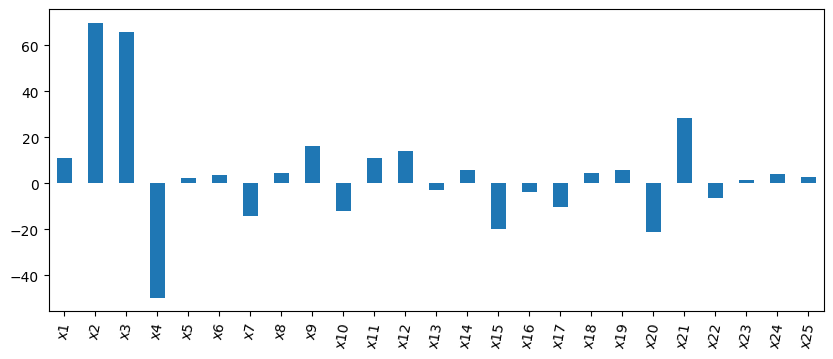

In [ ]:
plt.figure(figsize = (10, 4), dpi = 100)
# plot estimated regression coefficients
ax = lr_fitted_sm.params.plot.bar(rot = 80)

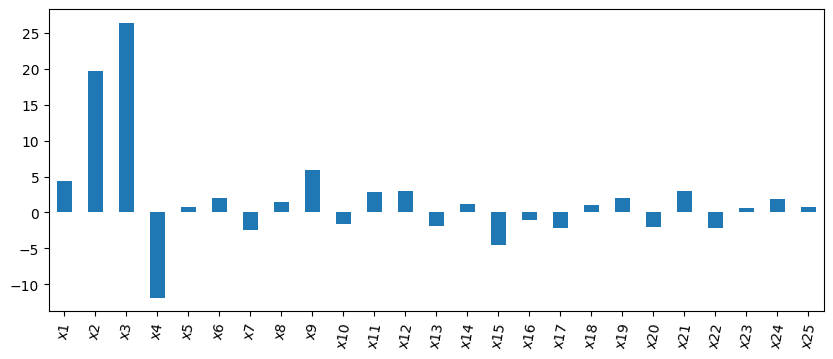

In [ ]:
plt.figure(figsize = (10, 4), dpi = 100)
# plot t-values for each coefficient
ax = lr_fitted_sm.tvalues.plot.bar(rot = 80)

In [ ]:
lr_fitted_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Valence   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     71.29
Date:                Wed, 07 Oct 2020   Prob (F-statistic):          5.31e-237
Time:                        16:47:57   Log-Likelihood:                -7458.3
No. Observations:                1739   AIC:                         1.497e+04
Df Residuals:                    1714   BIC:                         1.510e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.8770      2.518      4.320      0.000       5.938      15.816
x2            69.7404      3.557     19.608      0.000      62.764      76.717
x3            66.0182      2.505     26.350      0.000      61.104      70.932
x4           -49.6471      4.200    -11.820      0.000     -57.885     -41.409
x5             2.1809      2.629      0.830      0.407      -2.975       7.336
x6             3.8044      1.916      1.986      0.047       0.046       7.562
x7           -14.0692      5.655     -2.488      0.013     -25.160      -2.978
x8             4.3130      2.961      1.457      0.145      -1.494      10.120
x9            16.0889      2.729      5.895      0.000      10.736      21.442
x10          -12.1558      7.772     -1.564      0.118     -27.400       3.088
x11           10.8175      3.855      2.806      0.005       3.256      18.379
x12           14.1424      4.658      3.036      0.002       5.006      23.278
x13           -3.1002      1.634     -1.897      0.058      -6.306       0.105
x14            5.7300      4.784      1.198      0.231      -3.653      15.113
x15          -19.9326      4.345     -4.588      0.000     -28.454     -11.411
x16           -3.6292      3.437     -1.056      0.291     -10.370       3.112
x17          -10.3415      4.791     -2.158      0.031     -19.739      -0.944
x18            4.5988      4.323      1.064      0.288      -3.881      13.078
x19            5.8673      2.879      2.038      0.042       0.220      11.515
x20          -21.1464     10.841     -1.951      0.051     -42.410       0.117
x21           28.5797      9.596      2.978      0.003       9.758      47.402
x22           -6.2221      2.932     -2.122      0.034     -11.972      -0.472
x23            1.5508      2.254      0.688      0.491      -2.869       5.971
x24            3.9240      2.164      1.813      0.070      -0.320       8.168
x25            2.9027      3.584      0.810      0.418      -4.127       9.932
==============================================================================
Omnibus:                       16.570   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.030
Skew:                          -0.124   Prob(JB):                      0.00148
Kurtosis:                       2.657   Cond. No.                         39.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multinomial Logistic Regression with Regularization (MNIST Digits Recognition)

For more information: https://en.wikipedia.org/wiki/MNIST_database

### Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
type(digits)

sklearn.utils.Bunch

In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
type(digits.data)

numpy.ndarray

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
type(digits.target)

numpy.ndarray

In [ ]:
digits.target.shape

(1797,)

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

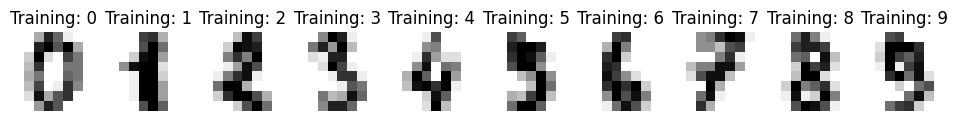

In [ ]:
_, axes = plt.subplots(1, 10, figsize = (12, 4), dpi = 100)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### X-Y Preparation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3, random_state = 48)

In [ ]:
x_train.shape

(1257, 64)

In [ ]:
y_train.shape

(1257,)

### Modelling

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr_sklearn = LogisticRegression().fit(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV # This works with Cross-Validation

In [ ]:
c_grid = np.logspace(-7, 1, num = 20)
lr_cv = LogisticRegressionCV(Cs = c_grid, fit_intercept = True, refit = True, cv = 5, penalty='l2', solver = 'saga', tol = 0.001, max_iter=1000, random_state = 48)

In [ ]:
lr_cv_fitted = lr_cv.fit(x_train, y_train)

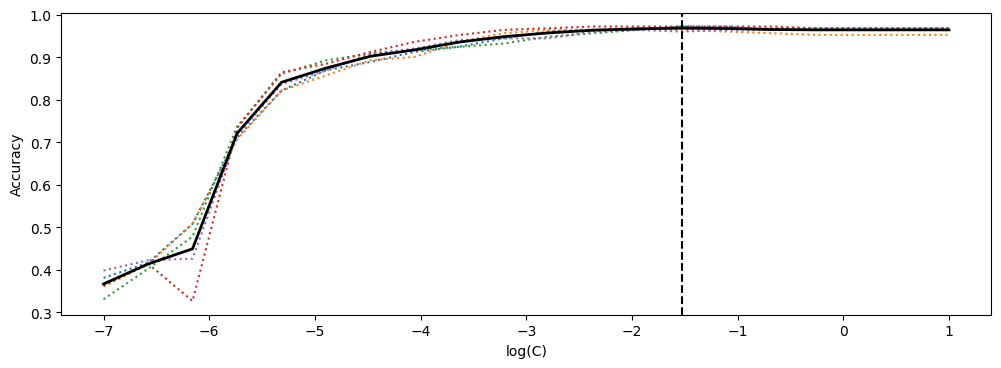

In [ ]:
log_c_grid = np.log10(c_grid); c_best = float(lr_cv.C_[0])
ax = plt.figure(figsize = (12, 4), dpi = 100)
ax = plt.plot(log_c_grid , lr_cv_fitted.scores_[0].transpose(), ':')
ax = plt.plot(log_c_grid , lr_cv_fitted.scores_[0].mean(axis=0), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(c_best), linestyle = '--', color = 'k')
ax = plt.xlabel('log(C)'); ax = plt.ylabel('Accuracy')

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_hat_train = lr_cv_fitted.predict(x_train)
y_hat_test = lr_cv_fitted.predict(x_test)

In [ ]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 1.00
Performance on Testing Data
  + accuracy: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_hat_test)

array([[55,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 67,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0, 37,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 62,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 39]])

# Binary Logistic Regression with Regularization (Movie Review)

source: http://www.cs.cornell.edu/people/pabo/movie-review-data/

The movie review data set is used for sentiment-analysis experiments. Available are collections of movie-review documents labeled with respect to their overall sentiment polarity (positive or negative) or subjective rating (e.g., "two and a half stars") and sentences labeled with respect to their subjectivity status (subjective or objective) or polarity.

Number of Instances: 1000 positive and 1000 negative

Number of Attributes: 1 (review Text)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Working on the Data

### Obtain Current Working Directory

In [ ]:
import os
os.getcwdb()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  


b'C:\\Users\\User'

In [ ]:
os.getcwdb().decode('utf-8')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


'C:\\Users\\User'

In [ ]:
type(os.getcwdb())

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


bytes

In [ ]:
type(os.getcwdb().decode('utf-8'))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


str

### List Files in Specified Directory

In [ ]:
os.listdir("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity")

['poldata.README.2.0', 'txt_sentoken']

In [ ]:
os.listdir("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity/txt_sentoken")

['neg', 'pos']

In [ ]:
name_neg = os.listdir("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity/txt_sentoken/neg")

In [ ]:
len(name_neg)

1000

In [ ]:
name_neg[:5]

['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt']

In [ ]:
name_pos = os.listdir("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity/txt_sentoken/pos")

In [ ]:
len(name_pos)

1000

In [ ]:
name_pos[:5]

['cv000_29590.txt',
 'cv001_18431.txt',
 'cv002_15918.txt',
 'cv003_11664.txt',
 'cv004_11636.txt']

### Read All Texts as Dictionary

In [ ]:
text_neg = {}
for key in name_neg:
    file_in = open(os.path.join("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity/txt_sentoken/neg", key), "rt")
    text_neg[key.split(".")[0]] = file_in.read()
    file_in.close()

In [ ]:
text_neg

{'cv000_29416': 'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as a

In [ ]:
text_pos = {}
for key in name_pos:
    file_in = open(os.path.join("./Desktop/Syllabus/1st year sem. 2/statistical learning/1082-psy5000-toward non-linearity/review_polarity/txt_sentoken/pos", key), "rt")
    text_pos[key.split(".")[0]] = file_in.read()
    file_in.close()

### Transform Dictionary into DataFrame

In [ ]:
df_neg = pd.DataFrame.from_dict(
    text_neg, orient = "index", columns = ["text"])

In [ ]:
df_neg.head()

text
cv000_29416  plot : two teen couples go to a church party ,...
cv001_19502  the happy bastard's quick movie review \ndamn ...
cv002_17424  it is movies like these that make a jaded movi...
cv003_12683   " quest for camelot " is warner bros . ' firs...
cv004_12641  synopsis : a mentally unstable man undergoing ...

In [ ]:
df_pos = pd.DataFrame.from_dict(
    text_pos, orient = "index", columns = ["text"])

In [ ]:
df_pos.head()

text
cv000_29590  films adapted from comic books have had plenty...
cv001_18431  every now and then a movie comes along from a ...
cv002_15918  you've got mail works alot better than it dese...
cv003_11664   " jaws " is a rare film that grabs your atten...
cv004_11636  moviemaking is a lot like being the general ma...

### Concatenate `df_neg` and `df_pos`

In [ ]:
df_neg["rating"] = "negative"
df_pos["rating"] = "positive"
df = pd.concat((df_neg, df_pos), axis = 0)

In [ ]:
df.index.name = "id"

In [ ]:
df.sample(n = 5, random_state = 1)

text    rating
id                                                                      
cv674_11593  steve martin is one of the funniest men alive ...  negative
cv699_7223   very few people would be unaware of beavis & b...  positive
cv282_6653   ok , let's get one thing straight right away :...  positive
cv315_11629  confession time : i have never , ever seen gon...  positive
cv210_9312   i must say from the outset that i have never b...  positive

### Preprocess with Regular Expression `re`

In [ ]:
!pip install re
import re

In [ ]:
df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x)) # Removing Punctuation

In [ ]:
df

text    rating  \
id                                                                         
cv000_29416  plot : two teen couples go to a church party ,...  negative   
cv001_19502  the happy bastard's quick movie review \ndamn ...  negative   
cv002_17424  it is movies like these that make a jaded movi...  negative   
cv003_12683   " quest for camelot " is warner bros . ' firs...  negative   
cv004_12641  synopsis : a mentally unstable man undergoing ...  negative   
...                                                        ...       ...   
cv995_21821  wow ! what a movie . \nit's everything a movie...  positive   
cv996_11592  richard gere can be a commanding actor , but h...  positive   
cv997_5046   glory--starring matthew broderick , denzel was...  positive   
cv998_14111  steven spielberg's second epic film on world w...  positive   
cv999_13106  truman ( " true-man " ) burbank is the perfect...  positive   

                                                text_processed  
id                                                              
cv000_29416  plot : two teen couples go to a church party  ...  
cv001_19502  the happy bastard's quick movie review \ndamn ...  
cv002_17424  it is movies like these that make a jaded movi...  
cv003_12683   " quest for camelot " is warner bros  ' first...  
cv004_12641  synopsis : a mentally unstable man undergoing ...  
...                                                        ...  
cv995_21821  wow  what a movie  \nit's everything a movie c...  
cv996_11592  richard gere can be a commanding actor  but he...  
cv997_5046   glory--starring matthew broderick  denzel wash...  
cv998_14111  steven spielberg's second epic film on world w...  
cv999_13106  truman ( " true-man " ) burbank is the perfect...  

[2000 rows x 3 columns]

### Wordcloud Visualization

In [ ]:
!pip install wordcloud

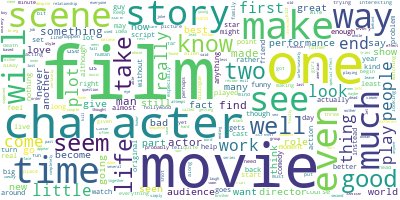

In [ ]:
from wordcloud import WordCloud

long_string = ','.join(list(df['text_processed'].values)) # Joinning the text_processed together

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

For more examples, check out https://amueller.github.io/word_cloud/

Documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

## X-Y Preparation

### Creating Term Frequency Matrix with `CountVectorizer`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # so-called Bag-of-words 

In [ ]:
vectorizer = CountVectorizer(max_df = .8, min_df = .03)
x = vectorizer.fit_transform(df.text)

In [ ]:
x # write sparse matrix with scipy.sparse.save_npz()

<2000x1838 sparse matrix of type '<class 'numpy.int64'>'
	with 392427 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names()[:10]

['000', '10', '100', '13', '15', '1995', '1996', '1997', '1998', '1999']

### Smt. Xtra

**Text Encoding**: Creating Term Frequency-Inverse Document Frequency (TFIDF) Matrix with `TfidfVectorizer`

For more detailed explanation, check out https://monkeylearn.com/blog/what-is-tf-idf/

**Text Encoding**: Word Embedding with `word2vec`

Introduction to Word Embedding: https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

**Dimension Reduction**: Reducing Dimension with `TruncatedSVD`

For more detailed explanation, check out https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d

**Dimension Reduction**: Topic Modelling with Latent Dirichlet Allocation `LDA` & Visualize with `pyLDAvis`

Looking for tutorial, check out https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

### Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, df.rating, test_size = 0.3, random_state = 48)

In [ ]:
x_train.shape

(1400, 1838)

In [ ]:
x_test.shape

(600, 1838)

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
c_grid = np.logspace(-2, 3, num = 50)
lr_cv = LogisticRegressionCV(Cs = c_grid, fit_intercept = True, refit = True, cv = 5, penalty = 'l1', solver = 'saga', tol=0.001, max_iter=1000, random_state = 48)

In [ ]:
lr_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.26485522e-02, 1.59985872e-02, 2.02358965e-02,
       2.55954792e-02, 3.23745754e-02, 4.09491506e-02, 5.17947468e-02,
       6.55128557e-02, 8.28642773e-02, 1.04811313e-01, 1.32571137e-01,
       1.67683294e-01, 2.12095089e-01, 2.68269580e-01, 3.39322177e-01,
       4.29193426e-01, 5.42867544e-01, 6.86648845e-01, 8.68511374e-01,
       1.09854114e+00, 1.38...
       1.20679264e+02, 1.52641797e+02, 1.93069773e+02, 2.44205309e+02,
       3.08884360e+02, 3.90693994e+02, 4.94171336e+02, 6.25055193e+02,
       7.90604321e+02, 1.00000000e+03]),
                     class_weight=None, cv=5, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=1000,
                     multi_class='warn', n_jobs=None, penalty='l1',
                     random_state=48, refit=True, scoring=None, solver='saga',
                     tol=0.001, verbose=0)

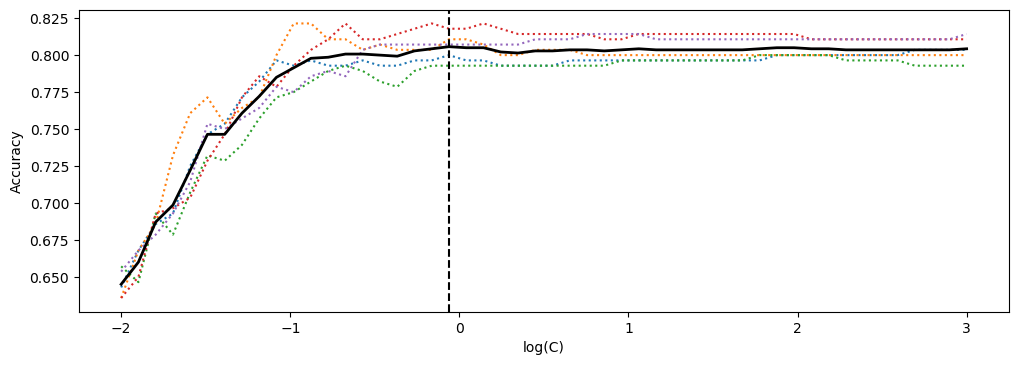

In [ ]:
c_best = lr_cv.C_[0]; log_c_grid = np.log10(c_grid)
ax = plt.figure(figsize = (12, 4), dpi = 100)
ax = plt.plot(log_c_grid , lr_cv.scores_["positive"].transpose(), ':')
ax = plt.plot(log_c_grid , lr_cv.scores_["positive"].mean(axis=0), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(c_best), linestyle = '--', color = 'k')
ax = plt.xlabel('log(C)'); ax = plt.ylabel('Accuracy')

## Model Evaluation

In [ ]:
y_hat_train = lr_cv.predict(x_train)
y_prob_train = lr_cv.predict_proba(x_train)
y_hat_test = lr_cv.predict(x_test)
y_prob_test = lr_cv.predict_proba(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('  + area under ROC: %.2f' % roc_auc_score(y_train, y_prob_train[:,1]))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))
print('  + area under ROC: %.2f' % roc_auc_score(y_test, y_prob_test[:,1]))

Performance on Training Data
  + accuracy: 0.99
  + area under ROC: 1.00
Performance on Testing Data
  + accuracy: 0.81
  + area under ROC: 0.88


## Interpreting Regression Coefficients

In [ ]:
print("Number of No-Zero Coefficients:", (lr_cv.coef_ != 0).sum())

Number of No-Zero Coefficients: 1082


In [ ]:
coef_hat = pd.Series(lr_cv.coef_ .reshape([-1]), 
                     index = vectorizer.get_feature_names())

In [ ]:
coef_hat.sort_values(inplace = True)

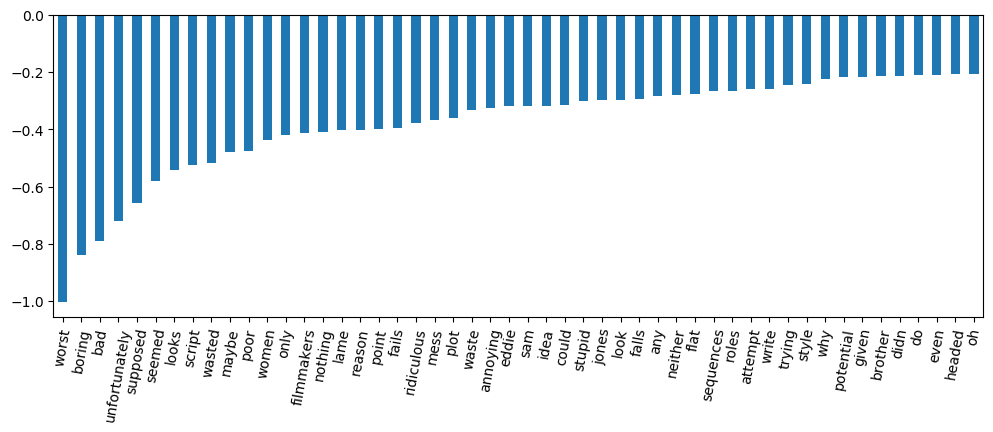

In [ ]:
plt.figure(figsize = (12, 4), dpi = 100)
ax = coef_hat[:50].plot.bar(rot = 80)

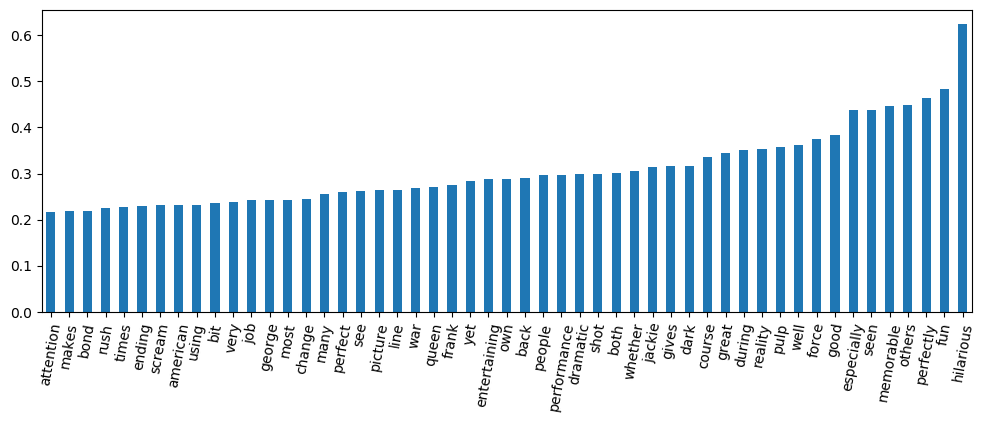

In [ ]:
plt.figure(figsize = (12, 4), dpi = 100)
ax = coef_hat[-51:].plot.bar(rot = 80)